In [2]:
import math
import numpy as np
import time, random
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML
from pydrake.math import sin, cos
from pydrake.all import *
from underactuated import (FindResource, PlanarRigidBodyVisualizer)


In [28]:
%reload_ext autoreload
%autoreload 2
from dynamics_nd import \
get_nd_state, get_nd_dynamics, get_corner_distances, \
get_corner_x_positions, compute_optimal_control, MeshcatCubeVisualizer, \
contact_next_state, periodic_motion

In [4]:
vis = MeshcatCubeVisualizer()

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7001/static/


In [29]:
traj, input_traj, force_traj, time_array = periodic_motion()

Number of decision vars 859
SolutionResult.kSolutionFound


In [30]:
dimension = 2

In [38]:
# trajectory found
dt = time_array[1] - time_array[0]
for i in range(len(traj)):
    vis.draw_transformation(traj[i,:],dimension)
    time.sleep(dt)

In [32]:
%reload_ext autoreload
%autoreload 2
from plotting import *

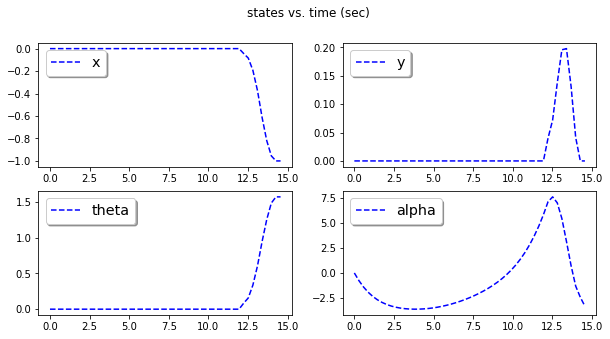

In [34]:
plot_states(traj, time_array, dimension)

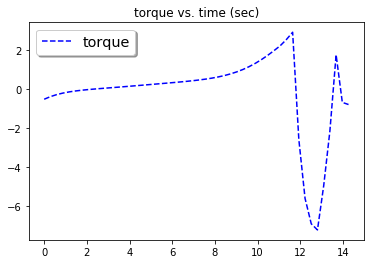

In [35]:
input_plot(input_traj, time_array, dimension)

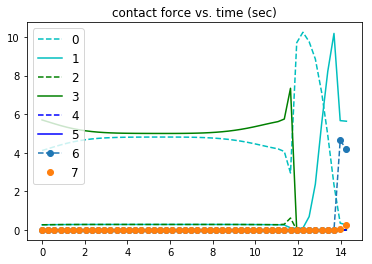

In [39]:
ground_force_plot(force_traj, time_array, dimension)

In [18]:
dim = 3
angle = 0.0
angle_vel = 0.0 # 5.0
current_state = get_nd_state((0,0.0,angle,0.0,0.,0.,angle_vel,00.0), dim)
vis.draw_transformation(current_state, dim)

In [17]:
# code to simulate dynamics
sec = 0.5 # seconds
steps_per_sec = 50.0 # discrete steps in a second
num_steps = sec*steps_per_sec # total number of steps
sec_per_step = sec/num_steps # number of seconds per step
for t in np.linspace(0,sec,num_steps):
    torque = [0.0]
    force = np.asarray([0.,0.,0.,0.,0.,0.,0.,0.])
    current_state += get_nd_dynamics(current_state,torque,force,dim)*sec_per_step
#     current_state = contact_next_state(current_state,torque,sec_per_step,dim)
    vis.draw_transformation(current_state, dim)
    time.sleep(sec_per_step)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  
